In [596]:
### Import Relevant Libraries
### Like Pandas, Numpy, Matplotlit, Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings module and filtering set to ignore
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [597]:
# Pre-setting pandas display option by using pre-defined set_option function

pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [598]:
# Import/Read provided data set and data information file.

bsa_df = pd.read_csv("./day.csv").set_index('instant')

In [599]:
# Display Bike Sharing Assignment Data

bsa_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [600]:
# Shape of the data frame
# Consists of 730 rows and 16 columns
bsa_df.shape

(730, 15)

In [601]:
# Extracting various information from the given bsa data frame

bsa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [602]:
# Modifying/Creating new column for good readability as 'day'

bsa_df['day'] = pd.DatetimeIndex(bsa_df['dteday']).day

In [603]:
bsa_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

In [604]:
# Describe Numeric Data Columns in given data set

bsa_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,15.720548
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,8.802278
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,8.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,31.000000


In [606]:
# Check Null/Missing Values

print(round(bsa_df.isnull().sum()/len(bsa_df)*100,2))

print(bsa_df.duplicated().any().sum())

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
day           0.0
dtype: float64
0


In [607]:
# Keeping the copy of data-set

bsa_df_cpy = bsa_df.copy()

In [608]:
bsa_df_cpy.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
day             int64
dtype: object

In [609]:
bsa_df_cpy['season'] = bsa_df_cpy['season'].replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'])
bsa_df_cpy['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [610]:
bsa_df_cpy["weathersit"].replace(to_replace=(1,2,3,4),value=("cloudy","mist","snow","rain"),inplace=True)

In [611]:
bsa_df_cpy["mnth"].replace(to_replace=(1,2,3,4,5,6,7,8,9,10,11,12),value=("jan","feb","March","april","may","june","july","aug","sept","oct","nov","dec"),inplace=True)


In [612]:
bsa_df_cpy["weekday"].replace(to_replace=(0,1,2,3,4,5,6),value=("sun","mon","tue","wed","thu","fri","sat"),inplace=True)

In [613]:
bsa_df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  day         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 97.0+ KB


In [614]:
bsa_df_cpy.drop(['casual','registered',"dteday"],axis=1,inplace=True)

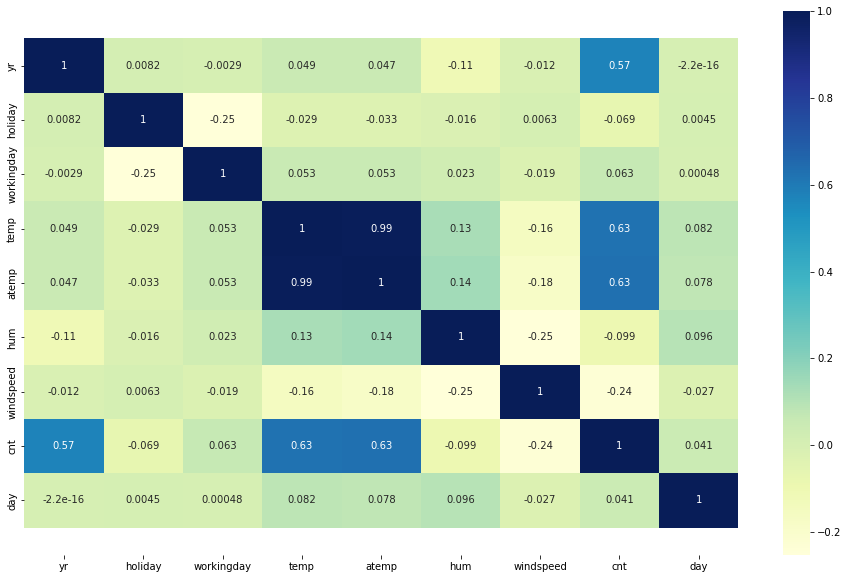

In [615]:
# View the correlation of various columns
plt.figure(figsize = (16, 10))
cor=bsa_df_cpy.corr()
ax=sns.heatmap(cor, annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [616]:
bsa_ordered_vars = ['day', 'mnth']
bsa_nominal_vars = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

bsa_df_cpy[bsa_ordered_vars] = bsa_df_cpy[bsa_ordered_vars].apply(lambda x: pd.Categorical(x, ordered=True))
bsa_df_cpy[bsa_nominal_vars] = bsa_df_cpy[bsa_nominal_vars].astype('category')

bsa_df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  day         730 non-null    category
dtypes: category(8), float64(4), int64(1)
memory usage: 42.6 KB


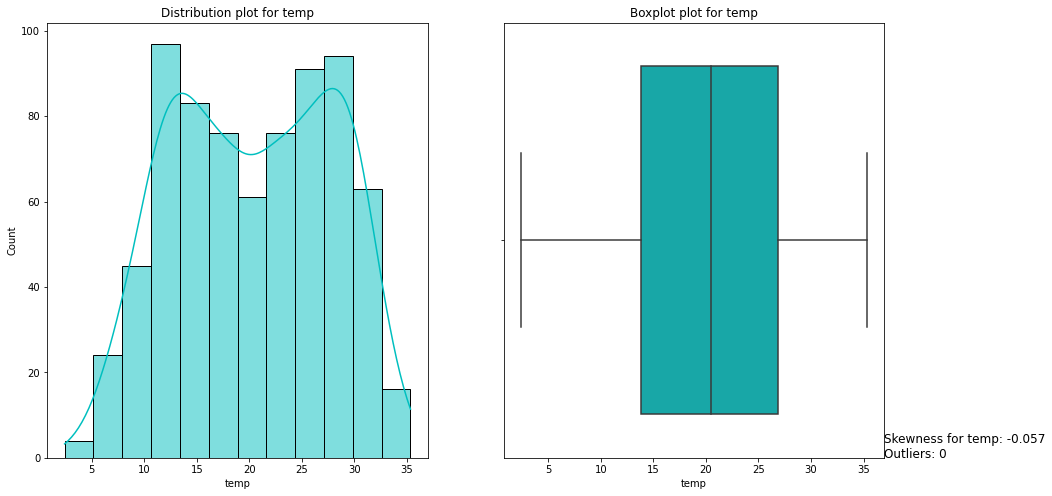

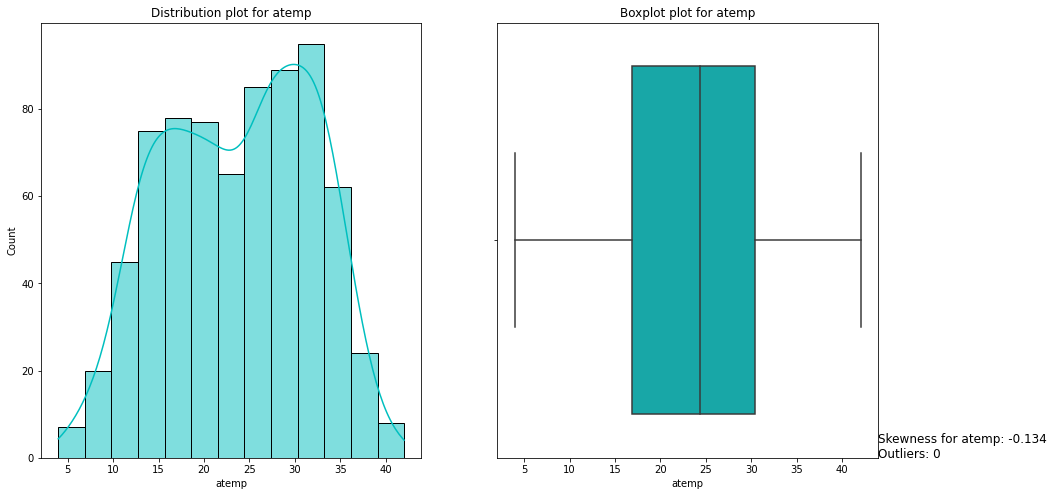

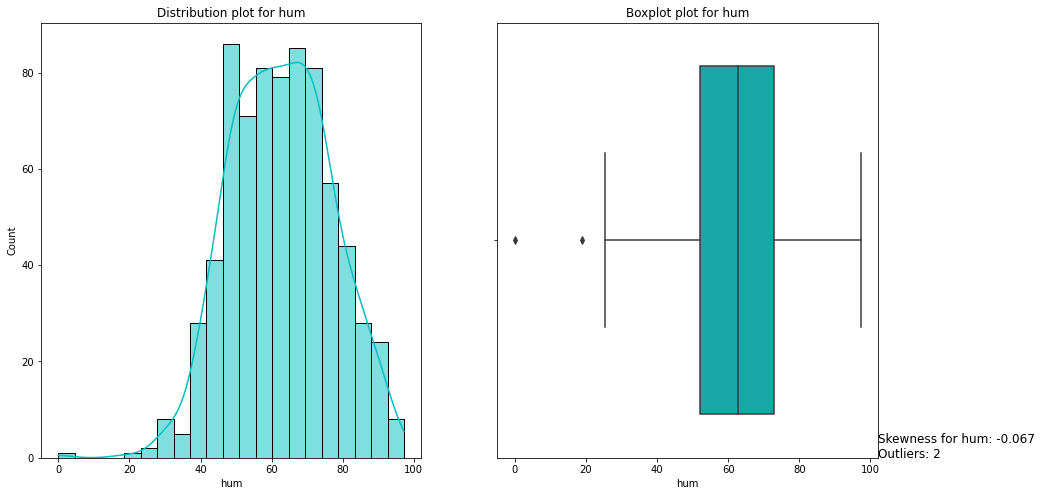

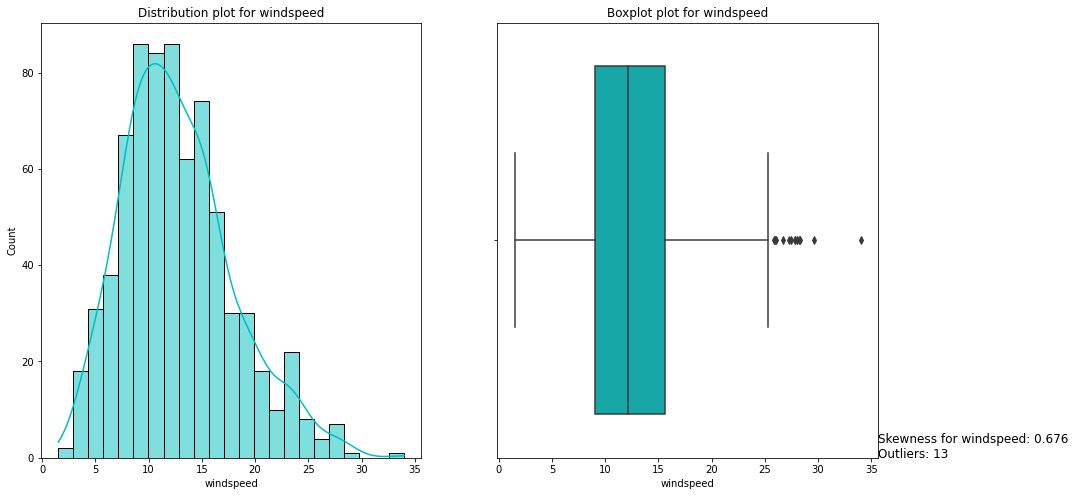

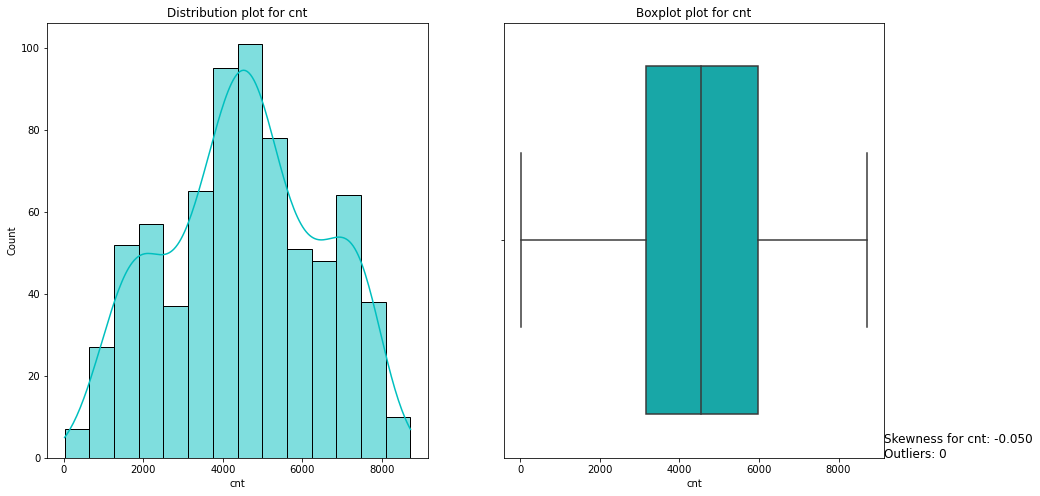

In [617]:
def bsa_plots(df):
     for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
             bsa_numerical_plot(df,column)
        '''
        else :
             bsa_categorical_plot(df,column)
        '''

def bsa_numerical_plot(df,column):
            # Plot histogram and box plots
            fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 8), sharex=True, sharey=False)
            sns.histplot(data=df, x=column, kde=True, ax=axes[0], color='c')
            axes[0].set_title(f'Distribution plot for {column}')
            sns.boxplot(data=df, x=column, ax=axes[1], color='c')
            axes[1].set_title(f'Boxplot plot for {column}')
            
            # Add skewness information
            textstr = f'Skewness for {column}: {df[column].skew():.3f}\n'
            
            # Perform outlier detection
            iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)
            cutoff = iqr * 1.5
            upper_bound = np.percentile(df[column], 75) + cutoff
            lower_bound = np.percentile(df[column], 25) - cutoff
            outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
            
            textstr += f'Outliers: {len(outliers)}'
            
            axes[1].text(1.0, 0.0, textstr, fontsize=12, transform=plt.gca().transAxes)
            
            plt.show()

def bsa_categorical_plot(df,column):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 8), sharex=True, sharey=False)
    sns.boxplot(data=df, x=column, y="count")
    axes[1].set_title(f'Boxplot plot for {column}')  

def bsa_pairplots(df,columns):
      sns.pairplot(data=df, vars=columns)

bsa_plots(bsa_df_cpy)

Observations : 

i) Observing outliers 2 and 13 in Humidity and Windspeed


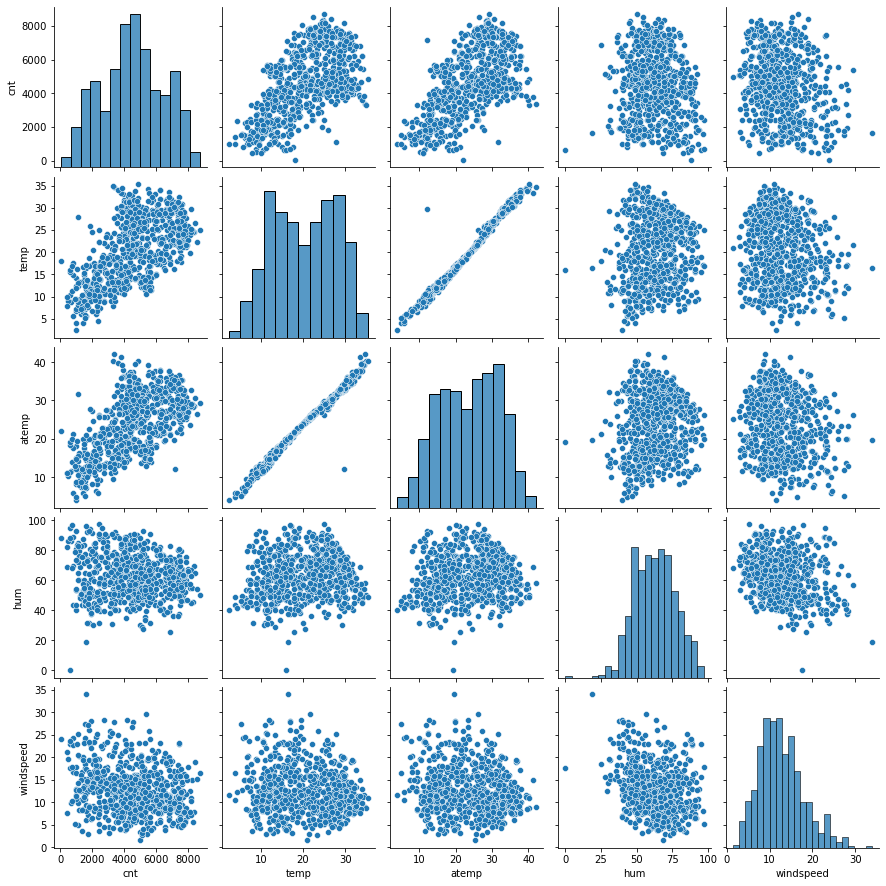

In [618]:
# Visualising Numerical Columns as Pair Plots

bsa_pairplots(bsa_df_cpy,columns=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])

_**By these plots, we can defitinely infer that a linear model can be considered as there are some independent variables that show correlation with cnt_**

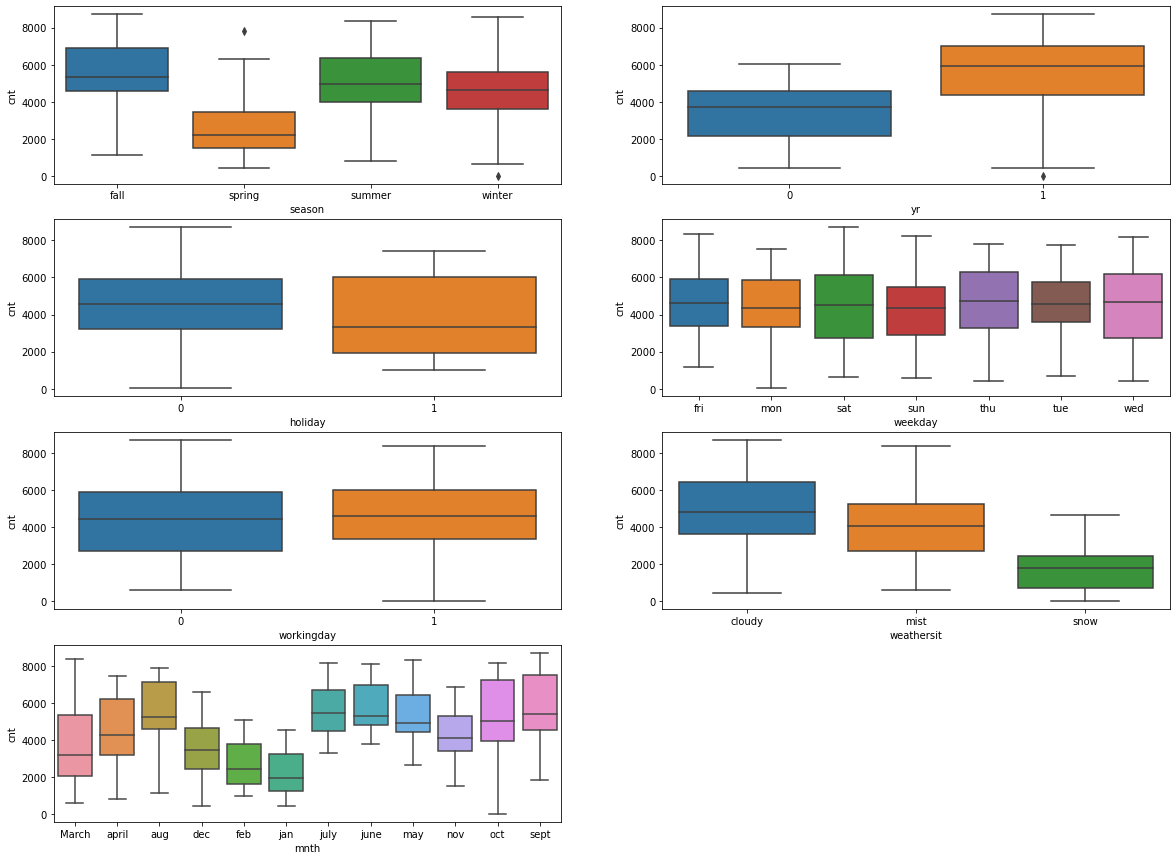

In [619]:
# Plotting Categorical Box Plots

plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bsa_df_cpy)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bsa_df_cpy)
plt.subplot(4,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bsa_df_cpy)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bsa_df_cpy)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bsa_df_cpy)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bsa_df_cpy)
plt.subplot(4,2,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bsa_df_cpy)
plt.show()

Observations : 

1) For the season graph, The median for season (spring) is very low, whereas the median for season fall is highest.
2) For year graph, Compared to year 2018, 2019 saw higher median value ie higher count of users. Additionally observing outlier for 2019 year.
3) For Holiday graph, the count of users is low on holiday compared to non-holidays.
4) For Weekday graph, the demand or median value seems to be constant for entire week.
5) For Month graph, the count is highest in August.

season: Almost 32% of the bike booking were happening in fall with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months May,June,July,Aug,Sept with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

In [620]:
# Create Dummy Variable

dummy = bsa_df_cpy[['season','mnth','weekday','weathersit']]

In [621]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [622]:
bsa_df_cpy = pd.concat([dummy,bsa_df_cpy],axis = 1)

In [623]:
bsa_df_cpy.head()

print(bsa_df_cpy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season_spring    730 non-null    uint8   
 1   season_summer    730 non-null    uint8   
 2   season_winter    730 non-null    uint8   
 3   mnth_april       730 non-null    uint8   
 4   mnth_aug         730 non-null    uint8   
 5   mnth_dec         730 non-null    uint8   
 6   mnth_feb         730 non-null    uint8   
 7   mnth_jan         730 non-null    uint8   
 8   mnth_july        730 non-null    uint8   
 9   mnth_june        730 non-null    uint8   
 10  mnth_may         730 non-null    uint8   
 11  mnth_nov         730 non-null    uint8   
 12  mnth_oct         730 non-null    uint8   
 13  mnth_sept        730 non-null    uint8   
 14  weekday_mon      730 non-null    uint8   
 15  weekday_sat      730 non-null    uint8   
 16  weekday_sun      730 non-null    uint8   
 1

In [624]:
# Dropping original columns one by one

bsa_df_cpy.drop(['season'],axis=1,inplace=True)
bsa_df_cpy.drop(['weathersit'],axis=1,inplace=True)

bsa_df_cpy.drop(['weekday'],axis=1,inplace=True)

bsa_df_cpy.drop(['mnth'],axis=1,inplace=True)


bsa_df_cpy.head()
print(bsa_df_cpy.shape)

bsa_df_cpy_70_30 = bsa_df_cpy.copy()

(730, 31)


In [625]:
# Splitting the data into train/test -> 80% vs 20%

train_80, test_20 = train_test_split(bsa_df_cpy, train_size = 0.8, test_size = 0.2, random_state = 333)
train_70, test_30 = train_test_split(bsa_df_cpy_70_30, train_size = 0.7, test_size = 0.3, random_state = 333)

In [626]:
print(train_80.shape, train_70.shape)

(584, 31) (510, 31)


In [627]:
test_20.shape, test_30.shape

((146, 31), (219, 31))

In [628]:
print(train_80.info(), train_70.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 156 to 420
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season_spring    584 non-null    uint8   
 1   season_summer    584 non-null    uint8   
 2   season_winter    584 non-null    uint8   
 3   mnth_april       584 non-null    uint8   
 4   mnth_aug         584 non-null    uint8   
 5   mnth_dec         584 non-null    uint8   
 6   mnth_feb         584 non-null    uint8   
 7   mnth_jan         584 non-null    uint8   
 8   mnth_july        584 non-null    uint8   
 9   mnth_june        584 non-null    uint8   
 10  mnth_may         584 non-null    uint8   
 11  mnth_nov         584 non-null    uint8   
 12  mnth_oct         584 non-null    uint8   
 13  mnth_sept        584 non-null    uint8   
 14  weekday_mon      584 non-null    uint8   
 15  weekday_sat      584 non-null    uint8   
 16  weekday_sun      584 non-null    uint8   


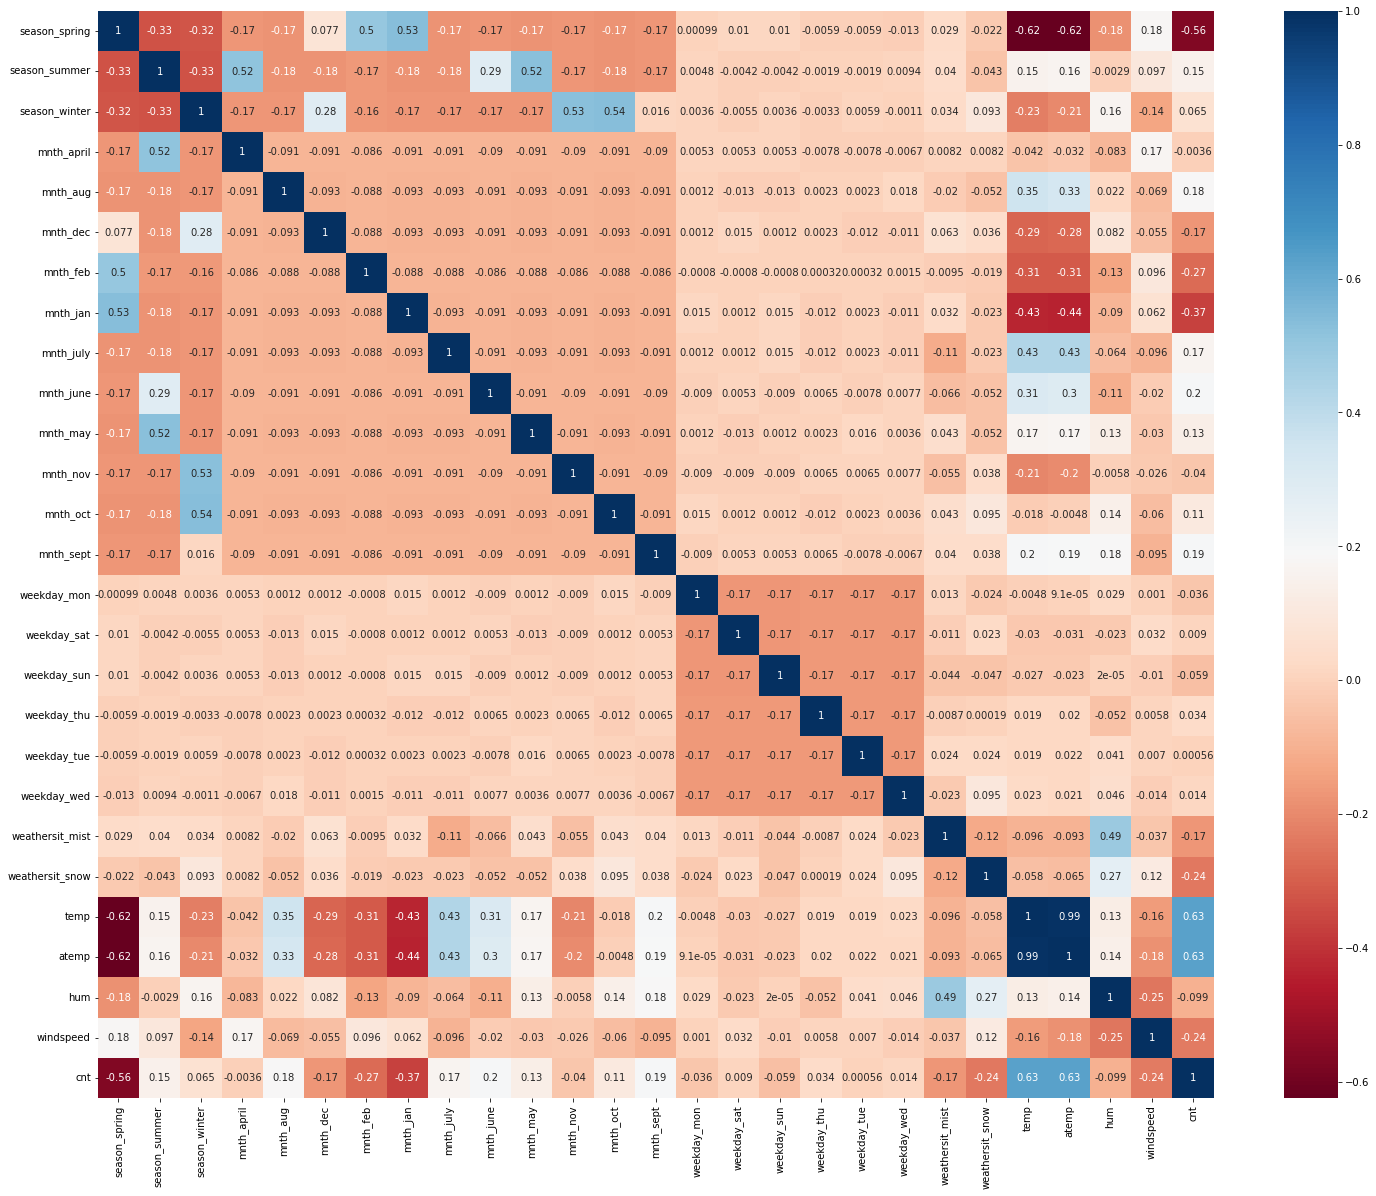

In [629]:
### Correlation Matrix

plt.figure(figsize = (25,20))
sns.heatmap(bsa_df_cpy.corr(), annot = True, cmap="RdBu")
plt.show()

Insights:
* The heatmap clearly shows all variables which are multicollinear, and which variable have high collinearity with the target variable.
* Reference to this map back-and-forth while building the linear model shall be done so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Rescaling Features

In [630]:
scaler = MinMaxScaler()

In [631]:
num_vars = ['temp','atemp', 'hum', 'windspeed','cnt']

In [632]:
train_80[num_vars] = scaler.fit_transform(train_80[num_vars])
train_70[num_vars] = scaler.fit_transform(train_70[num_vars])

In [633]:
print(train_80.head(), train_70.head())

         season_spring  season_summer  season_winter  mnth_april  mnth_aug  \
instant                                                                      
156                  0              1              0           0         0   
698                  0              0              1           0         0   
233                  0              0              0           0         1   
115                  0              1              0           1         0   
393                  1              0              0           0         0   

         mnth_dec  mnth_feb  mnth_jan  mnth_july  mnth_june  mnth_may  \
instant                                                                 
156             0         0         0          0          1         0   
698             0         0         0          0          0         0   
233             0         0         0          0          0         0   
115             0         0         0          0          0         0   
393            

In [634]:
print(train_80.describe(), train_70.describe())

       season_spring  season_summer  season_winter  mnth_april    mnth_aug  \
count     584.000000     584.000000     584.000000  584.000000  584.000000   
mean        0.243151       0.251712       0.238014    0.085616    0.097603   
std         0.429353       0.434369       0.426233    0.280037    0.297031   
min         0.000000       0.000000       0.000000    0.000000    0.000000   
25%         0.000000       0.000000       0.000000    0.000000    0.000000   
50%         0.000000       0.000000       0.000000    0.000000    0.000000   
75%         0.000000       1.000000       0.000000    0.000000    0.000000   
max         1.000000       1.000000       1.000000    1.000000    1.000000   

         mnth_dec    mnth_feb    mnth_jan   mnth_july   mnth_june    mnth_may  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.075342    0.077055    0.083904    0.082192    0.077055    0.087329   
std      0.264169    0.266907    0.277482    0.274892 

### Building Linear Model

#### Splitting into X,Y sets for model building

In [635]:
y_train_80 = train_80.pop('cnt')
X_train_80 = train_80

y_train_70 = train_70.pop('cnt')
X_train_70 = train_70

In [637]:
# Running RFE with the output number of the variable equal to 15
lm_80 = LinearRegression()
lm_80.fit(X_train_80, y_train_80)

rfe_80 = RFE(lm_80,n_features_to_select=15)           # running RFE
rfe_80 = rfe_80.fit(X_train_80, y_train_80)

lm_70 = LinearRegression()
lm_70.fit(X_train_70, y_train_70)

rfe_70 = RFE(lm_70,n_features_to_select=15)           # running RFE
rfe_70 = rfe_70.fit(X_train_70, y_train_70)

In [638]:
print(list(zip(X_train_80.columns,rfe_80.support_,rfe_80.ranking_)))
print(list(zip(X_train_70.columns,rfe_70.support_,rfe_70.ranking_)))

[('season_spring', True, 1), ('season_summer', False, 15), ('season_winter', True, 1), ('mnth_april', False, 9), ('mnth_aug', False, 6), ('mnth_dec', False, 2), ('mnth_feb', False, 4), ('mnth_jan', False, 3), ('mnth_july', True, 1), ('mnth_june', False, 11), ('mnth_may', False, 16), ('mnth_nov', True, 1), ('mnth_oct', False, 8), ('mnth_sept', True, 1), ('weekday_mon', False, 7), ('weekday_sat', True, 1), ('weekday_sun', True, 1), ('weekday_thu', False, 12), ('weekday_tue', False, 10), ('weekday_wed', False, 13), ('weathersit_mist', False, 5), ('weathersit_snow', True, 1), ('yr', True, 1), ('holiday', True, 1), ('workingday', True, 1), ('temp', True, 1), ('atemp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('day', False, 14)]
[('season_spring', True, 1), ('season_summer', False, 12), ('season_winter', True, 1), ('mnth_april', False, 8), ('mnth_aug', False, 6), ('mnth_dec', True, 1), ('mnth_feb', True, 1), ('mnth_jan', True, 1), ('mnth_july', True, 1), ('mnth_june', False, 10), 

In [639]:
col_80 = X_train_80.columns[rfe_80.support_]
col_70 = X_train_70.columns[rfe_70.support_]

print(col_80, col_70)

Index(['season_spring', 'season_winter', 'mnth_july', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_snow', 'yr', 'holiday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object') Index(['season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sept', 'weathersit_mist',
       'weathersit_snow', 'yr', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')


In [640]:
print(X_train_80.columns[~rfe_80.support_])
print(X_train_70.columns[~rfe_70.support_])

Index(['season_summer', 'mnth_april', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_june', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_mist', 'day'],
      dtype='object')
Index(['season_summer', 'mnth_april', 'mnth_aug', 'mnth_june', 'mnth_may',
       'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'holiday', 'workingday', 'day'],
      dtype='object')


In [641]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_80 = X_train_80[col_80]
X_train_rfe_70 = X_train_70[col_70]

### Building Linear Model using STATS Model
#### Exploring and Building the first model - Model 1

In [642]:
def get_vif_from_train_rfe(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif



In [643]:
vif_80 = get_vif_from_train_rfe(X_train_rfe_80)
vif_70 = get_vif_from_train_rfe(X_train_rfe_70)
vif80_gt5 = vif_80[vif_80['VIF'] > 5]
vif70_gt5 = vif_70[vif_70['VIF'] > 5]


In [644]:
vif80_gt5

,Features,VIF
11,temp,58.33
12,atemp,56.69
10,workingday,42.21
5,weekday_sat,10.13
6,weekday_sun,9.35


In [645]:
vif70_gt5

,Features,VIF
11,temp,353.54
12,atemp,352.02
13,hum,23.93
14,windspeed,5.15


### VIF Observations for Model 1

The following variables has high VIF values

                            

|S.No   |  Features  |  80-20DS | 70-30DS |
|:------|:-----------|:---------|:--------|
|1| atemp    |   _*56.69*_ | _*352.02*_ | 
|2| workingday   |   _*42.21*_ | _*NA*_ |
|3| weekday_sat   |   _*10.13*_ | _*NA*_ |
|4| weekday_sun| _*9.35*_ | _*NA*_ |
|5| hum | _*NA*_ | _*23.93*_ |
    	          
	              
	              

We will consider them in our further modelling and prune them from the DF step by step

In [646]:
# Add a constant
X_train_lm1_80 = sm.add_constant(X_train_rfe_80)
X_train_lm1_70 = sm.add_constant(X_train_rfe_70)
# Create a first fitted model
lr1_80 = sm.OLS(y_train_80, X_train_lm1_80).fit()
lr1_70 = sm.OLS(y_train_70, X_train_lm1_70).fit()

print(lr1_80.params)
print('*'*100)
print(lr1_70.params)

const              0.307484
season_spring     -0.115748
season_winter      0.076065
mnth_july         -0.060590
mnth_nov          -0.045749
mnth_sept          0.060258
weekday_sat        0.112984
weekday_sun        0.060935
weathersit_snow   -0.206014
yr                 0.229132
holiday            0.035803
workingday         0.097762
temp               0.304428
atemp              0.210017
hum               -0.289278
windspeed         -0.190440
dtype: float64
****************************************************************************************************
const              0.392882
season_spring     -0.088663
season_winter      0.076156
mnth_dec          -0.069304
mnth_feb          -0.049005
mnth_jan          -0.068918
mnth_july         -0.049823
mnth_nov          -0.071463
mnth_sept          0.059465
weathersit_mist   -0.047365
weathersit_snow   -0.264079
yr                 0.230435
temp               0.293277
atemp              0.133309
hum               -0.170856
windspeed       

In [647]:
print("LR_80 Summary")
print(lr1_80.summary())

print('='*100)
print("LR_70 Summary")
print(lr1_70.summary())

LR_80 Summary
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     202.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.11e-210
Time:                        12:39:10   Log-Likelihood:                 568.00
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     569   BIC:                            -1040.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3075  

### Observations of summary statistics

##### 80-20DS vs 70-30DS Summary Insights

|S.No   |  Features  |  80-20DS  |          
|:------|:-----------|:--------- |         
|1| atemp   | _*0.123*_ |         
|2| holiday | _*0.082*_  |
|3| mnth_nov | _*0.007*_ |

===================================

|S.No   |  Features  |  70-30DS |          
|:------|:-----------|:--------- |         
|1| atemp   | _*0.373*_ |
|2| temp    | _*0.025*_ |
|3| mnth_feb| _*0.023*_ |    




#### Model - 2
* Trying to drop atemp variable


In [648]:
X_train80_model2 = X_train_rfe_80.drop(["atemp"],axis=1)
X_train70_model2 = X_train_rfe_70.drop(["atemp"],axis=1)

In [649]:
vif80_model2 = get_vif_from_train_rfe(X_train80_model2)
vif70_model2 = get_vif_from_train_rfe(X_train70_model2)

print(vif80_model2[vif80_model2['VIF']>5])
print('='*100)
print(vif70_model2[vif70_model2['VIF']>5])

       Features    VIF
10   workingday  41.93
5   weekday_sat  10.06
6   weekday_sun   9.28
     Features    VIF
12        hum  23.42
11       temp  16.95
13  windspeed   5.04


#### VIF Observations for Model2

|S.No   |  Features  |  80-20DS |
|:------|:-----------|:---------|
|1| workingday    |   _*29.28*_ |
|2| weekday_sat   |   _*14.92*_ |
|3| weekday_sun   |  _*9.28*_ |

====================================

|S.No   |  Features  |  70-30DS |
|:------|:-----------|:---------|
|1| hum    |   _*23.42*_ |
|2| temp   |   _*16.95*_ |
|3| windspeed   |  _*5.04*_ |

In [650]:
X_train80_lm2 = sm.add_constant(X_train80_model2)
X_train70_lm2 = sm.add_constant(X_train70_model2)


# Create a first fitted model
lr80_model2 = sm.OLS(y_train_80, X_train80_lm2).fit()
lr70_model2 = sm.OLS(y_train_70, X_train70_lm2).fit()

In [651]:
print(lr80_model2.params)
print('='*100)
print(lr70_model2.params)

const              0.310375
season_spring     -0.116144
season_winter      0.077728
mnth_july         -0.060879
mnth_nov          -0.046332
mnth_sept          0.059055
weekday_sat        0.114074
weekday_sun        0.062141
weathersit_snow   -0.207309
yr                 0.229218
holiday            0.035504
workingday         0.098656
temp               0.498559
hum               -0.286516
windspeed         -0.197313
dtype: float64
const              0.395902
season_spring     -0.088553
season_winter      0.077183
mnth_dec          -0.069832
mnth_feb          -0.049238
mnth_jan          -0.070386
mnth_july         -0.049787
mnth_nov          -0.072215
mnth_sept          0.058620
weathersit_mist   -0.047723
weathersit_snow   -0.265242
yr                 0.230468
temp               0.415618
hum               -0.168786
windspeed         -0.187299
dtype: float64


In [653]:
print(lr80_model2.summary())
print("="*100)
print(lr70_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          8.97e-211
Time:                        12:40:41   Log-Likelihood:                 566.77
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     570   BIC:                            -1044.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3104      0.024     

### Model 3

* Removing 'workingday'/'hum' variable and continue prepping the new model


In [654]:
X_train80_model3 = X_train80_model2.drop(["workingday"], axis = 1)
X_train70_model3 = X_train70_model2.drop(["hum"], axis=1)


In [655]:
vif80_model3 = get_vif_from_train_rfe(X_train80_model3)
vif70_model3 = get_vif_from_train_rfe(X_train70_model3)

print(vif80_model3)
print("="*100)
print(vif70_model3)

           Features    VIF
11              hum  14.80
10             temp  13.37
12        windspeed   5.04
1     season_winter   2.44
0     season_spring   2.40
8                yr   2.07
3          mnth_nov   1.64
2         mnth_july   1.43
5       weekday_sat   1.22
4         mnth_sept   1.21
6       weekday_sun   1.21
7   weathersit_snow   1.11
9           holiday   1.05
           Features   VIF
11             temp  5.24
12        windspeed  5.03
0     season_spring  4.20
1     season_winter  2.42
4          mnth_jan  2.30
3          mnth_feb  2.24
10               yr  2.04
6          mnth_nov  1.82
8   weathersit_mist  1.53
2          mnth_dec  1.52
5         mnth_july  1.37
7         mnth_sept  1.21
9   weathersit_snow  1.07


In [656]:
X_train80_lm3 = sm.add_constant(X_train80_model3)
X_train70_lm3 = sm.add_constant(X_train70_model3)

# Create a first fitted model
lr80_model3 = sm.OLS(y_train_80, X_train80_lm3).fit()
lr70_model3 = sm.OLS(y_train_70, X_train70_lm3).fit()

In [657]:
print(lr80_model3.params)
print("="*100)
print(lr70_model3.params)

const              0.409031
season_spring     -0.116144
season_winter      0.077728
mnth_july         -0.060879
mnth_nov          -0.046332
mnth_sept          0.059055
weekday_sat        0.015418
weekday_sun       -0.036514
weathersit_snow   -0.207309
yr                 0.229218
holiday           -0.063152
temp               0.498559
hum               -0.286516
windspeed         -0.197313
dtype: float64
const              0.303644
season_spring     -0.086553
season_winter      0.071272
mnth_dec          -0.082184
mnth_feb          -0.054138
mnth_jan          -0.076869
mnth_july         -0.042346
mnth_nov          -0.073365
mnth_sept          0.053151
weathersit_mist   -0.075665
weathersit_snow   -0.315355
yr                 0.234951
temp               0.382729
windspeed         -0.152288
dtype: float64


In [658]:
print(lr80_model3.summary())
print("=*"*100)
print(lr70_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          8.97e-211
Time:                        12:40:54   Log-Likelihood:                 566.77
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     570   BIC:                            -1044.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4090      0.030     

#### VIF and Model Summary Statistics

##### VIF Stats

|S.No   |  Features  |  80-20DS | 70-30DS |
|:------|:-----------|:---------|:--------|
|1| hum    |   _*14.8*_ | _*NA*_ |

============================================

##### Model3 80-20 Summary

|S.No   |  Features  |  80-20DS |
|:------|:-----------|:---------|
|1| weekday_sat    |   _*0.157*_ |  
|2| holiday   |   _*0.011*_ |
|3| mnth_nov   |   _*0.007*_ |

=============================================

##### Model3 70-30 Summary

|S.No   |  Features  |  70-30DS |
|:------|:-----------|:---------|
|1| mnth_july    |   _*0.017*_ |  
|2| mnth_feb   |   _*0.014*_ |

In [659]:
X_train80_model4 = X_train80_model3.drop(["hum"],axis=1)
X_train70_model4 = X_train70_model3.drop(["mnth_july"],axis=1)

In [660]:
vif80_model4 = get_vif_from_train_rfe(X_train80_model4)
vif70_model4 = get_vif_from_train_rfe(X_train80_model4)

print(vif80_model4[vif80_model4['VIF'] > 5])
print("=*"*100)
print(vif70_model4[vif70_model4['VIF'] > 5])

   Features   VIF
10     temp  5.04
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
   Features   VIF
10     temp  5.04


In [661]:
X_train80_lm4 = sm.add_constant(X_train80_model4)
X_train70_lm4 = sm.add_constant(X_train70_model4)

# Create a first fitted model
lr80_model4 = sm.OLS(y_train_80, X_train80_lm4).fit()
lr70_model4 = sm.OLS(y_train_70, X_train70_lm4).fit()

In [662]:
print(lr80_model4.params)
print("=*"*100)
print(lr70_model4.params)

const              0.217691
season_spring     -0.113748
season_winter      0.061231
mnth_july         -0.040997
mnth_nov          -0.032059
mnth_sept          0.046982
weekday_sat        0.015278
weekday_sun       -0.037574
weathersit_snow   -0.274724
yr                 0.238070
holiday           -0.061444
temp               0.466629
windspeed         -0.133678
dtype: float64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
const              0.314543
season_spring     -0.087976
season_winter      0.072713
mnth_dec          -0.085897
mnth_feb          -0.057227
mnth_jan          -0.082341
mnth_nov          -0.076882
mnth_sept          0.059698
weathersit_mist   -0.074072
weathersit_snow   -0.317703
yr                 0.235276
temp               0.353954
windspeed         -0.148048
dtype: float64


In [663]:
print(lr80_model4.summary())
print("=*"*50)
print(lr70_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     194.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.51e-192
Time:                        12:41:25   Log-Likelihood:                 520.86
No. Observations:                 584   AIC:                            -1016.
Df Residuals:                     571   BIC:                            -958.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2177      0.025     

#### Model 4 VIF and Summary Stats

##### VIF Stats

|S.No   |  Features  |  80-20DS | 70-30DS |
|:------|:-----------|:---------|:--------|

 
* Implying all VIF values are ~ 5 or slightly greater than 5

============================================

##### Model3 80-20 Summary

|S.No   |  Features  |  80-20DS |
|:------|:-----------|:---------|
|1| weekday_sat   |   _*0.194*_ |
|2| mnth_july   |   _*0.017*_ |
|3| mnth_nov    | _*0.08*_ |
|4| holiday | _*0.021*_ |

=============================================

##### Model3 70-30 Summary

|S.No   |  Features  |  70-30DS |
|:------|:-----------|:---------|  
|1| mnth_feb  |   _*0.010*_ |

#### Model 5



In [664]:
X_train80_model5 = X_train80_model4.drop(["weekday_sat"],axis=1)
X_train70_model5 = X_train70_model4.drop(["mnth_feb"], axis=1)

In [665]:
vif80_model5 = get_vif_from_train_rfe(X_train80_model5)
vif70_model5 = get_vif_from_train_rfe(X_train70_model5)

print(vif80_model5)
print("=*"*50)
print(vif70_model5)

           Features   VIF
9              temp  4.99
10        windspeed  4.95
7                yr  2.06
1     season_winter  1.93
0     season_spring  1.69
3          mnth_nov  1.63
2         mnth_july  1.37
4         mnth_sept  1.20
5       weekday_sun  1.17
6   weathersit_snow  1.05
8           holiday  1.05
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
           Features   VIF
10        windspeed  4.86
9              temp  4.22
1     season_winter  2.33
0     season_spring  2.28
8                yr  2.04
4          mnth_nov  1.80
3          mnth_jan  1.58
6   weathersit_mist  1.50
2          mnth_dec  1.37
5         mnth_sept  1.17
7   weathersit_snow  1.07


In [666]:
X_train80_lm5 = sm.add_constant(X_train80_model5)
X_train70_lm5 = sm.add_constant(X_train70_model5)

lr80_model5 = sm.OLS(y_train_80, X_train80_lm5).fit()
lr70_model5 = sm.OLS(y_train_70, X_train70_lm5).fit()

In [667]:
print(lr80_model5.params)
print("=*"*50)
print(lr70_model5.params)

const              0.221793
season_spring     -0.114498
season_winter      0.060464
mnth_july         -0.040054
mnth_nov          -0.032096
mnth_sept          0.047385
weekday_sun       -0.040422
weathersit_snow   -0.275270
yr                 0.238319
holiday           -0.064290
temp               0.464007
windspeed         -0.132823
dtype: float64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
const              0.304179
season_spring     -0.114329
season_winter      0.070252
mnth_dec          -0.069165
mnth_jan          -0.049145
mnth_nov          -0.069766
mnth_sept          0.060410
weathersit_mist   -0.072506
weathersit_snow   -0.311584
yr                 0.235127
temp               0.367907
windspeed         -0.148355
dtype: float64


In [668]:
print(lr80_model5.summary())
print("=*"*50)
print(lr70_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     211.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.35e-193
Time:                        12:41:49   Log-Likelihood:                 519.99
No. Observations:                 584   AIC:                            -1016.
Df Residuals:                     572   BIC:                            -963.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2218      0.025     

#### VIF and Summary Stats Observations : 

##### VIF Stats

|S.No   |  Features  |  80-20DS | 70-30DS |
|:------|:-----------|:---------|:--------|

 
* Implying all VIF values are ~ 5 or slightly greater than 5

============================================

##### Model5 80-20 Summary

|S.No   |  Features  |  80-20DS |
|:------|:-----------|:---------|
|1| month_nov   |   _*0.080*_ |
|2| mnth_july  | _*0.020*_ |
|3| holiday | _*0.016*_ |

=============================================

##### Model5 70-30 Summary

|S.No   |  Features  |  70-30DS |
|:------|:-----------|:---------|  
|1| mnth_jan   |   _*0.008*_ |

In [669]:
X_train80_model6 = X_train80_model5.drop(["mnth_nov"],axis=1)
X_train70_model6 = X_train70_model5.drop(["mnth_jan"],axis=1)

In [670]:
vif70_model6 = get_vif_from_train_rfe(X_train70_model6)
vif80_model6 = get_vif_from_train_rfe(X_train80_model6)
print(vif80_model6[vif80_model6['VIF'] >= 5])
print("=*"*50)
print(vif70_model6[vif70_model6['VIF'] >= 5])

Empty DataFrame
Columns: [Features, VIF]
Index: []
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Empty DataFrame
Columns: [Features, VIF]
Index: []


In [671]:

X_train80_lm6 = sm.add_constant(X_train80_model6)
X_train70_lm6 = sm.add_constant(X_train70_model6)


# Create a first fitted model
lr80_model6 = sm.OLS(y_train_80, X_train80_lm6).fit()
lr70_model6 = sm.OLS(y_train_70, X_train70_lm6).fit()


In [672]:
print(lr80_model6.params)
print("=*"*50)
print(lr70_model6.params)

const              0.215994
season_spring     -0.110367
season_winter      0.051074
mnth_july         -0.041535
mnth_sept          0.050151
weekday_sun       -0.039468
weathersit_snow   -0.274313
yr                 0.238389
holiday           -0.068089
temp               0.473388
windspeed         -0.135878
dtype: float64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
const              0.291276
season_spring     -0.124884
season_winter      0.070951
mnth_dec          -0.058792
mnth_nov          -0.064536
mnth_sept          0.060492
weathersit_mist   -0.072352
weathersit_snow   -0.308253
yr                 0.234358
temp               0.385989
windspeed         -0.147094
dtype: float64


In [673]:
print(lr80_model6.summary())
print("=*"*50)
print(lr70_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     231.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          6.93e-194
Time:                        12:42:18   Log-Likelihood:                 518.43
No. Observations:                 584   AIC:                            -1015.
Df Residuals:                     573   BIC:                            -966.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2160      0.025     

#### Model 7

In [680]:
X_train80_model7 = X_train80_model6.drop(["mnth_july"],axis=1)
X_train80_model7.columns

Index(['season_spring', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_snow', 'yr', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [681]:
vif80_model7 = get_vif_from_train_rfe(X_train80_model7)
print(vif80_model7[vif80_model7['VIF'] >= 5])

Empty DataFrame
Columns: [Features, VIF]
Index: []


In [682]:
X_train80_lm7 = sm.add_constant(X_train80_model7)
# Create a first fitted model
lr80_model7 = sm.OLS(y_train_80, X_train80_lm7).fit()


In [683]:
print(lr80_model7.params)


const              0.225689
season_spring     -0.113949
season_winter      0.051349
mnth_sept          0.057294
weekday_sun       -0.040610
weathersit_snow   -0.276536
yr                 0.238914
holiday           -0.071452
temp               0.446911
windspeed         -0.131276
dtype: float64


In [684]:
print(lr80_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     254.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          7.59e-194
Time:                        12:47:18   Log-Likelihood:                 515.47
No. Observations:                 584   AIC:                            -1011.
Df Residuals:                     574   BIC:                            -967.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2257      0.024     

In [686]:
X_train80_model8 = X_train80_model7.drop(["holiday"],axis=1)
X_train80_model8.columns

Index(['season_spring', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_snow', 'yr', 'temp', 'windspeed'],
      dtype='object')

In [687]:
vif80_model8 = get_vif_from_train_rfe(X_train80_model8)
print(vif80_model8[vif80_model8['VIF'] >= 5])

Empty DataFrame
Columns: [Features, VIF]
Index: []


In [688]:
X_train80_lm8 = sm.add_constant(X_train80_model8)
# Create a first fitted model
lr80_model8 = sm.OLS(y_train_80, X_train80_lm8).fit()

In [690]:
lr80_model8.params

const              0.225323
season_spring     -0.115038
season_winter      0.049042
mnth_sept          0.057646
weekday_sun       -0.038372
weathersit_snow   -0.274088
yr                 0.238909
temp               0.445912
windspeed         -0.132740
dtype: float64

In [689]:
print(lr80_model8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     282.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.58e-193
Time:                        12:49:24   Log-Likelihood:                 511.81
No. Observations:                 584   AIC:                            -1006.
Df Residuals:                     575   BIC:                            -966.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2253      0.024     

#### Best Fit Linear Equation for variables involved on Model6

const              0.225323
season_spring     -0.115038
season_winter      0.049042
mnth_sept          0.057646
weekday_sun       -0.038372
weathersit_snow   -0.274088
yr                 0.238909
temp               0.445912
windspeed         -0.132740

const              0.291276
season_spring     -0.124884
season_winter      0.070951
mnth_dec          -0.058792
mnth_nov          -0.064536
mnth_sept          0.060492
weathersit_mist   -0.072352
weathersit_snow   -0.308253
yr                 0.234358
temp               0.385989
windspeed         -0.147094

|S.No       |  Linear Equation |
|:------    |:-----------|
|80-20DS    |cnt_80_20 =  0.225323 + (__*temp*__ * 0.445912) + (__*yr*__ * 0.238909) + (__*mnth_sept*__ * 0.057646) + (__*season_winter*__ * 0.049042) - (__*season_spring*__ * 0.115038) - (__*weathersit_snow*__ * 0.274088) - (__*weekday_sun*__ *  0.038372) - (__*windspeed*__ * 0.132740)|
|70-30DS    |cnt_70_30 =  0.291276 + (__*temp*__ * 0.385989) + (__*yr*__ * 0.234358) + (__*mnth_sept*__ * 0.060492) + (__*season_winter*__ * 0.070951) + (__*season_spring*__ * 0.124884) - (__*weathersit_snow*__ * 0.308253) - (__*mnth_nov*__*0.064536) - (__*windspeed*__ * 0.147094) - (__*mnth_dec*__ * 0.058792) - (__*weathersit_mist*__ * 0.072352)|


#### Coefficient Interpretation based on above linear equations

|S.No       |  Observations |
|:------    |:-----------|
|Temp |One value increase in 'Temp', increases the cnt value by 0.445912 or 0.385989 units.|
|Year |One value increase in 'Year', increases the cnt value by 0.238909 or 0.234358 units.|
|Month-Sept|One value increase in 'Month_Sept', increases the cnt value by 0.057646 or 0.060492 units.|
|Season Winter| One value increase in 'Season Winter' wrt foremost season, increases the cnt value by 0.049042 or 0.070951 units.|
|Season Spring|  One value increase in 'Season Spring' wrt foremost season, decreases the cnt value by 0.115038 or 0.124884 units|
|Weather Situation Snow| One value increase in 'Weather Situation Snow' foremost Weather situation, decreases the cnt value by 0.274088 or 0.308253 units.|
|Weekday Sunday|One value increase in 'Weekday Sunday' wrt foremost weekday, decreases the cnt value by 0.038372| 
|Windspeed|One value increase in 'Windspeed' wrt cnt, decreases cnt value by 0.132740 or 0.147094.|
|Holiday|One value increase in 'Holiday', decreases cnt value by 0.115629 or 0.107197  (Implying if working-day it would be certainly increase)|
|Weather Situation Mist| One value increase in 'Weather Situation Mist', decreases the value of cnt by 0.072352.|
|Const|If absence of all these variable, we can clearly observe that cnt value increases by const value ie 0.225323 or 0.291276 units.|






#### Verification of LR Assumptions 

1. Error terms normal distribution

In [692]:
y_train80_pred = lr80_model8.predict(X_train80_lm8)
y_train70_pred = lr70_model6.predict(X_train70_lm6)

Text(0.5, 0, 'Errors')

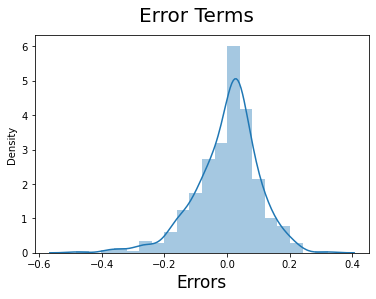

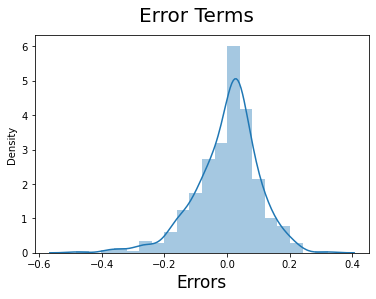

In [693]:
delta80 = y_train_80 - y_train80_pred
delta70 = y_train_70 - y_train70_pred

fig80 = plt.figure()
sns.distplot((delta80), bins = 20)
fig80.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 17)

fig70 = plt.figure()
sns.distplot((delta80), bins = 20)
fig70.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 17)


#### FINAL MODEL PREDICTIONS

In [694]:
print(test_20.columns)

print(test_30.columns)

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

test_20[num_vars] = scaler.transform(test_20[num_vars])
test_30[num_vars] = scaler.transform(test_30[num_vars])

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_april',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_mist', 'weathersit_snow',
       'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day'],
      dtype='object')
Index(['season_spring', 'season_summer', 'season_winter', 'mnth_april',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_mist', 'weathersit_snow',
       'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day'],
      dtype='object')


In [695]:
print(test_20.head())

print("=*"*50)

print(test_30.head)

         season_spring  season_summer  season_winter  mnth_april  mnth_aug  \
instant                                                                      
23                   1              0              0           0         0   
469                  0              1              0           1         0   
554                  0              0              0           0         0   
505                  0              1              0           0         0   
354                  0              0              1           0         0   

         mnth_dec  mnth_feb  mnth_jan  mnth_july  mnth_june  mnth_may  \
instant                                                                 
23              0         0         1          0          0         0   
469             0         0         0          0          0         0   
554             0         0         0          1          0         0   
505             0         0         0          0          0         1   
354            

In [696]:
print(test_20.describe())

print(test_30.describe())



       season_spring  season_summer  season_winter  mnth_april    mnth_aug  \
count     146.000000     146.000000     146.000000  146.000000  146.000000   
mean        0.260274       0.253425       0.267123    0.068493    0.034247   
std         0.440294       0.436469       0.443980    0.253460    0.182488   
min         0.000000       0.000000       0.000000    0.000000    0.000000   
25%         0.000000       0.000000       0.000000    0.000000    0.000000   
50%         0.000000       0.000000       0.000000    0.000000    0.000000   
75%         1.000000       0.750000       1.000000    0.000000    0.000000   
max         1.000000       1.000000       1.000000    1.000000    1.000000   

         mnth_dec    mnth_feb    mnth_jan   mnth_july   mnth_june    mnth_may  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.123288    0.075342    0.089041    0.095890    0.102740    0.075342   
std      0.329899    0.264852    0.285783    0.295454 

In [697]:
y_test_20 = test_20.pop('cnt')
y_test_30 = test_30.pop('cnt')
X_test_20 = test_20
X_test_30 = test_30
print(X_test_20.info())
print(X_test_30.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 23 to 492
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season_spring    146 non-null    uint8   
 1   season_summer    146 non-null    uint8   
 2   season_winter    146 non-null    uint8   
 3   mnth_april       146 non-null    uint8   
 4   mnth_aug         146 non-null    uint8   
 5   mnth_dec         146 non-null    uint8   
 6   mnth_feb         146 non-null    uint8   
 7   mnth_jan         146 non-null    uint8   
 8   mnth_july        146 non-null    uint8   
 9   mnth_june        146 non-null    uint8   
 10  mnth_may         146 non-null    uint8   
 11  mnth_nov         146 non-null    uint8   
 12  mnth_oct         146 non-null    uint8   
 13  mnth_sept        146 non-null    uint8   
 14  weekday_mon      146 non-null    uint8   
 15  weekday_sat      146 non-null    uint8   
 16  weekday_sun      146 non-null    uint8   
 

In [698]:
train80_model8_cols=X_train80_model8.columns
train70_model6_cols = X_train70_model6.columns
X_test20 = X_test_20[train80_model8_cols]
X_test30 = X_test_30[train70_model6_cols]
# Adding constant variable to test dataframe
X_test20_lm8 = sm.add_constant(X_test20)
X_test30_lm6 = sm.add_constant(X_test30)
print(X_test20_lm8.info())
print(X_test30_lm6.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 23 to 492
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   const            146 non-null    float64 
 1   season_spring    146 non-null    uint8   
 2   season_winter    146 non-null    uint8   
 3   mnth_sept        146 non-null    uint8   
 4   weekday_sun      146 non-null    uint8   
 5   weathersit_snow  146 non-null    uint8   
 6   yr               146 non-null    category
 7   temp             146 non-null    float64 
 8   windspeed        146 non-null    float64 
dtypes: category(1), float64(3), uint8(5)
memory usage: 5.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 23 to 314
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   const            219 non-null    float64 
 1   season_spring    219 non-null    uint8   
 2   season_wint

In [699]:
y_pred_20 = lr80_model8.predict(X_test20_lm8)
y_pred_30 = lr70_model6.predict(X_test30_lm6)

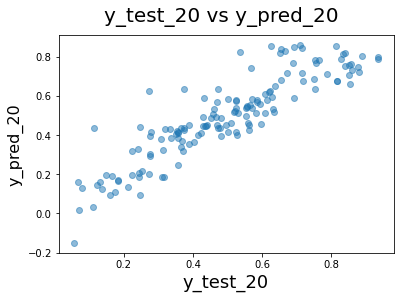

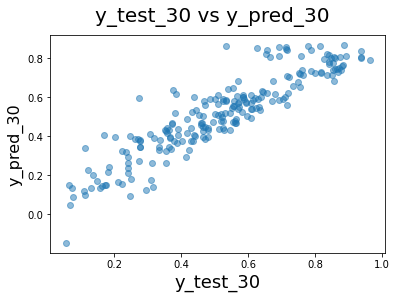

In [700]:
# Plotting y_test and y_pred to understand the spread

fig20 = plt.figure()
plt.scatter(y_test_20, y_pred_20, alpha=.5)
fig20.suptitle('y_test_20 vs y_pred_20', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_20', fontsize = 18)                          # X-label
plt.ylabel('y_pred_20', fontsize = 16) 
plt.show()

fig30 = plt.figure()
plt.scatter(y_test_30, y_pred_30, alpha=.5)
fig30.suptitle('y_test_30 vs y_pred_30', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_30', fontsize = 18)                          # X-label
plt.ylabel('y_pred_30', fontsize = 16) 
plt.show()



In [701]:
print("r2_80_20 = " + str(r2_score(y_test_20, y_pred_20)))
print("r2_70_30 = " + str(r2_score(y_test_30, y_pred_30)))

r2_80_20 = 0.7886158615541917
r2_70_30 = 0.8197903980276651


In [702]:
r2_80_20 = 0.7886158615541917
r2_70_30 = 0.8197903980276651

In [703]:
n_20 = X_test_20.shape[0]
n_30 = X_test_30.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p_20 = X_test_20.shape[1]
p_30 = X_test_30.shape[1]

# We find the Adjusted R-squared using the formula

adj_r2_80_20 = 1-(1-r2_80_20)*(n_20-1)/(n_20-p_20-1)
adj_r2_70_30 = 1-(1-r2_70_30)*(n_30-1)/(n_30-p_30-1)

print(adj_r2_80_20, adj_r2_70_30)

0.7334721732639808 0.791033546649101


#### FINAL RESULT COMPARISON

|S.No| Train/Test | 80-20 | 70-30
|:------  |:-----|:-------|:------|
|1| Train | 79.7   | 82.3  |
|2| Test  | 78.86  | 81.97 |

#### FINAL REPORT

* Top three predictors are 'tmp', 'yr', weathersit

#### Suggestions

* It is advised to further into the following features like windspeed, season_spring, season_winter for next best features concerning bike share demand.